In [1]:
import pandas as pd
import geopandas as gp
import os
import numpy as np

# National Shapefiles

Notebook to create 3 different, national-level shapefiles using the official maps we have hosted on the site.

Note: This notebook is up-to-date as off May 16th, 2022. 

The following state / geography pairs will not be present in the resulting file:

- AK - no CONG *1 seat
- DE - no CONG *1 seat
- ND - no CONG *1 seat
- SD - no CONG *1 seat
- VT - no CONG *1 seat
- WY - no CONG *1 seat
- NE - no SLDL * Not a level in NE

- MO - no CONG - IN PROGRESS
- MT - no SLDL - IN PROGRESS
- MT - no SLDU - IN PROGRESS
- NH - no SLDL - IN PROGRESS
- NH - no SLDU - IN PROGRESS
- NH - no CONG - IN PROGRESS
- NY - no SLDU - IN PROGRESS
- NY - no CONG - IN PROGRESS
- OH - no SLDL - IN PROGRESS
- OH - no SLDU - IN PROGRESS

The source files for this project were pulled from the following s3 path: 
- s3://data.redistrictingdatahub.org/web_ready_stage/legislative/2021_adopted_plans/

In [2]:
# Define the list of file names
file_list = ['tx_sldu_2021.zip', 'io_sldu_2021.zip', 'ny_sldl_adopted_2022.zip', 'sd_sl_adopted_2021.zip', 'mi_cong_adopted_2021.zip', 'vt_sldl_adopted_2022.zip', 'ms_sldl_adopted_2022.zip', 'sc_sldl_adopted_2021_kml.zip', 'mi_sldu_adopted_2021.zip', 'ct_sldu_2021.zip', 'de_sldu_2021.zip', 'fl_sldl_adopted_2022.zip', 'ga_cong_adopted_2021.zip', 'nc_sldu_adopted_2022.zip', 'ut_cong_2021.zip', 'or_cong_2021.zip', 'id_cong_2021.zip', 'wy_sldu_adopted_2022.zip', 'nc_cong_adopted_2022.zip', 'ga_sldu_adopted_2021.zip', 'ok_sldu_2021.zip', '.DS_Store', 'nv_cong_2021.zip', 'ma_sldu_2021.zip', 'ca_cong_adopted_2021.zip', 'il_sldu_2021.zip', 'pa_sldl_adopted_2022.zip', 'wi_sldl_adopted_2022.zip', 'ca_sldu_adopted_2021.zip', 'sc_sldl_adopted_2021_shp.zip', 'wv_sldu_2021.zip', 'al_sldu_2021.zip', 'ar_cong_2021.zip', 'hi_sldu_adopted_2022.zip', 'mn_sldl_adopted_2022.zip', 'de_sldl_2021.zip', 'ct_sldl_2021.zip', 'va_sldl_adopted_2021.zip', 'hi_cong_adopted_2022.zip', 'tn_cong_adopted_2022.zip', 'co_sldu_adopted_2021.zip', 'il_sldl_adopted_2021.zip', 'ky_sldl_adopted_2022.zip', 'io_sldl_2021.zip', 'tn_sldu_adopted_2022.zip', 'tx_sldl_2021.zip', 'az_cong_adopted_2022.zip', 'ne_leg_2021.zip', 'ak_sldu_adopted_2022.zip', 'co_cong_adopted_2021.zip', 'nm_cong_adopted_2021.zip', 'ks_sldl_adopted_2022.zip', 'mo_sldu_adopted_2022.zip', 'IN_Senate2021AdoptedOCT012021.zip', 'al_sldl_2021.zip', 'wv_sldl_2021.zip', 'wa_sl_adopted_2022.zip', 'ri_sldl_adopted_2022.zip', 'ma_sldl_2021.zip', 'la_sldu_adopted_2022.zip', 'nd_leg_2021.zip', 'md_sldl_adopted_2022.zip', 'nj_cong_2021.zip', 'ok_sldl_2021.zip', 'nm_sldu_adopted_2022.zip', 'sc_sldu_2021.zip', 'ct_cong_adopted_2022.zip', 'la_cong_adopted_2022.zip', 'wi_sldu_adopted_2022.zip', 'pa_sldu_adopted_2022.zip', 'wi_cong_adopted_2022.zip', 'io_cong_2021.zip', 'pa_cong_adopted_2022.zip', 'ca_sldl_adopted_2021.zip', 'tx_cong_2021.zip', 'sc_cong_adopted_2022.zip', 'ut_sldu_2021.zip', 'or_sldu_2021.zip', 'wa_cong_adopted_2022.zip', 'nc_sldl_adopted_2022.zip', 'ma_cong_2021.zip', 'fl_sldu_adopted_2022.zip', 'nv_sldu_2021.zip', 'fl_cong_adopted_2022.zip', 'ga_sldl_adopted_2021.zip', 'wy_sldl_adopted_2022.zip', 'ok_cong_2021.zip', 'az_sl_adopted_2022.zip', 'ar_sldu_2021.zip', 'vt_sldu_adopted_2022.zip', 'al_cong_2021.zip', 'wv_cong_2021.zip', 'in_sldl_2021.zip', 'ms_cong_adopted_2022.zip', 'nj_sl_adopted_2022.zip', 'mt_cong_2021.zip', 'mi_sldl_adopted_2021.zip', 'ms_sldu_adopted_2022.zip', 'la_sldl_adopted_2022.zip', 'md_cong_adopted_2022.zip', 'oh_cong_adopted_2022.zip', 'ut_sldl_2021.zip', 'or_sldl_2021.zip', 'md_sldu_adopted_2022.zip', 'ri_cong_adopted_2022.zip', 'mo_sldl_adopted_2022.zip', 'ks_sldu_adopted_2022.zip', 'ri_sldu_adopted_2022.zip', 'ks_cong_adopted_2022.zip', 'nm_sldl_adopted_2021.zip', 'co_sldl_adopted_2021.zip', 'il_cong_adopted_2021.zip', 'id_sld_2021.zip', 'ne_cong_2021.zip', 'ky_cong_adopted_2022.zip', 'ak_sldl_adopted_2022.zip', 'ar_sldl_2021.zip', 'IN_Congressional2021AdoptedOCT012021.zip', 'tn_sldl_adopted_2022.zip', 'ky_sldu_adopted_2022.zip', 'mn_sldu_adopted_2022.zip', 'va_cong_adopted_2021.zip', 'hi_sldl_adopted_2022.zip', 'va_sldu_adopted_2021.zip', 'mn_cong_adopted_2022.zip', 'nv_sldl_2021.zip']

In [3]:
# A list of files that need to be filtered out, as they don't have a standardized "DISTRICT" column
filter_out_list = ['ut_cong_2021.zip', 'nc_cong_adopted_2022.zip', 'nv_cong_2021.zip',
'ma_sldu_2021.zip', 'wi_sldl_adopted_2022.zip',
'co_sldu_adopted_2021.zip', 'tx_sldl_2021.zip', 'ak_sldu_adopted_2022.zip',
'co_cong_adopted_2021.zip', 'il_sldl_2021.zip', 
'la_sldu_adopted_2022.zip', 'la_cong_adopted_2022.zip', 'wi_sldu_adopted_2022.zip',
'wi_cong_adopted_2022.zip', 'tx_cong_2021.zip', 'ut_sldu_2021.zip',
'oh_cong_2021.zip', 'nv_sldu_2021.zip',
'mt_cong_2021.zip', 'la_sldl_adopted_2022.zip', 'oh_cong_adopted_2022.zip',
'ut_sldl_2021.zip', 'co_sldl_adopted_2021.zip', 'tx_sldu_2021.zip', 'ny_sldl_adopted_2022.zip',
'nv_sldl_2021.zip']

In [4]:
 # For the above files, a mapping of what file to use instead
column_to_use_dict = {'tx_sldu_2021.zip': 'District',
 'tx_cong_2021.zip': 'District', 
 'tx_sldl_2021.zip': 'District',
 
 'ny_sldl_adopted_2022.zip': 'ID',
 
 'vt_sldl_adopted_2022.zip': 'ID',
 'vt_sldu_adopted_2022.zip': 'NAME',
 
 'oh_cong_adopted_2022.zip': 'CONG_DIST',
 
 'ut_cong_2021.zip': 'DISTRICTNO',
 'ut_sldu_2021.zip': 'DISTRICTNO',
 'ut_sldl_2021.zip': 'DISTRICTNO',

 'la_sldu_adopted_2022.zip': 'DISTRICT_I',
 'la_cong_adopted_2022.zip': 'DISTRICT_I',
 'la_sldl_adopted_2022.zip': 'DISTRICT_I',
 
 'co_sldu_adopted_2021.zip': 'District',
 'co_sldl_adopted_2021.zip': 'District',
 'co_cong_adopted_2021.zip': 'District',
 
 'wi_sldl_adopted_2022.zip': 'ASM2021',
 'wi_sldu_adopted_2022.zip': 'SEN2021',
 'wi_cong_adopted_2022.zip': 'NAME',
 
 'nc_cong_adopted_2022.zip': 'District_A',
 
 'nv_cong_2021.zip': 'DISTRICTNO',
 'nv_sldu_2021.zip': 'DISTRICTNO',
 'nv_sldl_2021.zip': 'DISTRICTNO',
 
 'ma_sldu_2021.zip': 'ID',

 'ak_sldu_adopted_2022.zip': 'SEN_DIST',

 'mt_cong_2021.zip': 'ID'}

In [5]:
# Code to map every file to the appropriate level (cong, state house, state senate or some combo)
def get_map_level(file_name):
    if "sldu_" in file_name or file_name == "IN_Senate2021AdoptedOCT012021.zip" or file_name == "ne_leg_2021.zip":
        #print("SLDU")
        return ("SLDU",)
    elif "sldl_" in file_name:
        #print("SLDL")
        return ("SLDL",)
    elif "cong_" in file_name or file_name == 'IN_Congressional2021AdoptedOCT012021.zip':
        #print("CONG")
        return ("CONG",)
    elif "sl_" in file_name or file_name == 'nd_leg_2021.zip' or file_name == 'id_sld_2021.zip':
        #print("One state that shares districts:" ,file_name)
        return ("SLDU", "SLDL")
    else:
        return ("*****FIX THIS*******")

In [6]:
sldl_list = []
sldu_list = []
cong_list = []

for val in file_list:
    if "_kml" not in val and val not in ['.DS_Store']:
        test_load = gp.read_file("./raw-from-source/"+val)
        test_load = test_load.to_crs(3857)
        if val not in filter_out_list:   
            test_load = test_load[["DISTRICT", "geometry"]]
        else:
            test_load = test_load[[column_to_use_dict[val], "geometry"]]
            test_load.columns = ["DISTRICT", "geometry"]
        state_abbrev = val[0:2]
        if state_abbrev == "io":
            state_abbrev = "ia"
        state_abbrev = state_abbrev.upper()
        test_load["STATE"] = state_abbrev
        if state_abbrev in ["UT", "NV"]:
            test_load["DISTRICT"] = test_load["DISTRICT"].astype(int)
        test_load["DISTRICT"] = test_load["DISTRICT"].astype(str)
        test_load = test_load[["DISTRICT", "STATE", "geometry"]]
        print(val, " -> ", get_map_level(val))
        for level in get_map_level(val):
            if level == "SLDU":
                sldu_list.append(test_load)
            elif level == "SLDL":
                sldl_list.append(test_load)
            elif level == "CONG":
                cong_list.append(test_load)
            else:
                print(level)
                raise ValueError

tx_sldu_2021.zip  ->  ('SLDU',)
io_sldu_2021.zip  ->  ('SLDU',)
ny_sldl_adopted_2022.zip  ->  ('SLDL',)
sd_sl_adopted_2021.zip  ->  ('SLDU', 'SLDL')
mi_cong_adopted_2021.zip  ->  ('CONG',)
vt_sldl_adopted_2022.zip  ->  ('SLDL',)
ms_sldl_adopted_2022.zip  ->  ('SLDL',)
mi_sldu_adopted_2021.zip  ->  ('SLDU',)
ct_sldu_2021.zip  ->  ('SLDU',)
de_sldu_2021.zip  ->  ('SLDU',)
fl_sldl_adopted_2022.zip  ->  ('SLDL',)
ga_cong_adopted_2021.zip  ->  ('CONG',)
nc_sldu_adopted_2022.zip  ->  ('SLDU',)
ut_cong_2021.zip  ->  ('CONG',)
or_cong_2021.zip  ->  ('CONG',)
id_cong_2021.zip  ->  ('CONG',)
wy_sldu_adopted_2022.zip  ->  ('SLDU',)
nc_cong_adopted_2022.zip  ->  ('CONG',)
ga_sldu_adopted_2021.zip  ->  ('SLDU',)
ok_sldu_2021.zip  ->  ('SLDU',)
nv_cong_2021.zip  ->  ('CONG',)
ma_sldu_2021.zip  ->  ('SLDU',)
ca_cong_adopted_2021.zip  ->  ('CONG',)
il_sldu_2021.zip  ->  ('SLDU',)
pa_sldl_adopted_2022.zip  ->  ('SLDL',)
wi_sldl_adopted_2022.zip  ->  ('SLDL',)
ca_sldu_adopted_2021.zip  ->  ('SLDU',)
sc_

## Separate code for Maine

In [7]:
me_sldl = gp.read_file("./me_sldl_adopted_2021/me_sldl_adopted_2021.shp")
me_sldu = gp.read_file("./me_sldu_adopted_2021/me_sldu_adopted_2021.shp")
me_cong = gp.read_file("./me_cong_adopted_2021/me_cong_adopted_2021.shp")

me_sldl = me_sldl.to_crs(3857)
me_sldu = me_sldu.to_crs(3857)
me_cong = me_cong.to_crs(3857)

me_sldl["STATE"] = "ME"
me_sldu["STATE"] = "ME"
me_cong["STATE"] = "ME"

me_sldl = me_sldl[["DISTRICT", "STATE", "geometry"]]
me_sldu = me_sldu[["DISTRICT", "STATE", "geometry"]]
me_cong = me_cong[["DISTRICT", "STATE", "geometry"]]

cong_list.append(me_cong)
sldl_list.append(me_sldl)
sldu_list.append(me_sldu)

# Create the Files

In [8]:
national_sldl = gp.GeoDataFrame(pd.concat(sldl_list), crs = 3857)
national_sldu = gp.GeoDataFrame(pd.concat(sldu_list), crs = 3857)
national_cong = gp.GeoDataFrame(pd.concat(cong_list), crs = 3857)

In [9]:
national_sldl.sort_values("STATE", inplace = True)
national_sldu.sort_values("STATE", inplace = True)
national_cong.sort_values("STATE", inplace = True)

# Clean the Files

Both the ND and SD SLDU is off because it's a SL file and they each have two extra: 4A,4B; 9A, 9B for ND and 26A, 26B; 28A, 28B for SD.  

I can dissolve those districts and make new SLDU files on Monday.

For WY and VT, Ballotpedia is incorrect, and I've updated that doc you sent along.

In [10]:
national_sldu[(national_sldu["STATE"]=="SD") & (national_sldu["DISTRICT"].str.contains("26"))]

,DISTRICT,STATE,geometry
25,26B,SD,"POLYGON ((-10997763.001 5388264.191, -10999020..."
35,26A,SD,"POLYGON ((-11268650.215 5311600.458, -11268650..."


In [11]:
national_sldu_no_dakotas = national_sldu[~(national_sldu["STATE"].isin(["SD", "ND"]))]
national_sldu_dakotas = national_sldu[(national_sldu["STATE"].isin(["SD", "ND"]))]

In [12]:
def contains_alphanumeric(district_name):
    if "A" in district_name or "B" in district_name:
        return True
    else:
        return False

In [13]:
national_sldu_dakotas["DISTRICT_len"] = national_sldu_dakotas["DISTRICT"].apply(lambda x: contains_alphanumeric(x))

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [14]:
national_sldu_dakotas[national_sldu_dakotas["DISTRICT_len"]==True]

,DISTRICT,STATE,geometry,DISTRICT_len
22,9B,ND,"POLYGON ((-10947462.967 6274903.588, -10941644...",True
30,4B,ND,"POLYGON ((-11446813.796 6127452.806, -11446778...",True
47,4A,ND,"POLYGON ((-11377470.516 6020762.757, -11379830...",True
48,9A,ND,"POLYGON ((-11152276.789 6274742.380, -11151980...",True
25,26B,SD,"POLYGON ((-10997763.001 5388264.191, -10999020...",True
35,26A,SD,"POLYGON ((-11268650.215 5311600.458, -11268650...",True
36,28A,SD,"POLYGON ((-11354587.421 5627549.308, -11354728...",True
27,28B,SD,"POLYGON ((-11583398.684 5554228.019, -11583454...",True


In [15]:
national_sldu_dakotas["DISTRICT_mod"] = np.where(national_sldu_dakotas["DISTRICT_len"]==True, 
                                                national_sldu_dakotas["DISTRICT"].str[:-1],
                                                national_sldu_dakotas["DISTRICT"])

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [16]:
national_sldu_dakotas[national_sldu_dakotas["DISTRICT_len"] == True]

,DISTRICT,STATE,geometry,DISTRICT_len,DISTRICT_mod
22,9B,ND,"POLYGON ((-10947462.967 6274903.588, -10941644...",True,9
30,4B,ND,"POLYGON ((-11446813.796 6127452.806, -11446778...",True,4
47,4A,ND,"POLYGON ((-11377470.516 6020762.757, -11379830...",True,4
48,9A,ND,"POLYGON ((-11152276.789 6274742.380, -11151980...",True,9
25,26B,SD,"POLYGON ((-10997763.001 5388264.191, -10999020...",True,26
35,26A,SD,"POLYGON ((-11268650.215 5311600.458, -11268650...",True,26
36,28A,SD,"POLYGON ((-11354587.421 5627549.308, -11354728...",True,28
27,28B,SD,"POLYGON ((-11583398.684 5554228.019, -11583454...",True,28


In [17]:
national_sldu_dakotas["Dissolve_Col"] = national_sldu_dakotas["STATE"] + "-" + national_sldu_dakotas["DISTRICT_mod"]

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [18]:
national_sldu_dakotas_dissolved = national_sldu_dakotas.dissolve(["Dissolve_Col"])

In [19]:
national_sldu_dakotas_dissolved.reset_index(drop = False, inplace = True)

<AxesSubplot:>

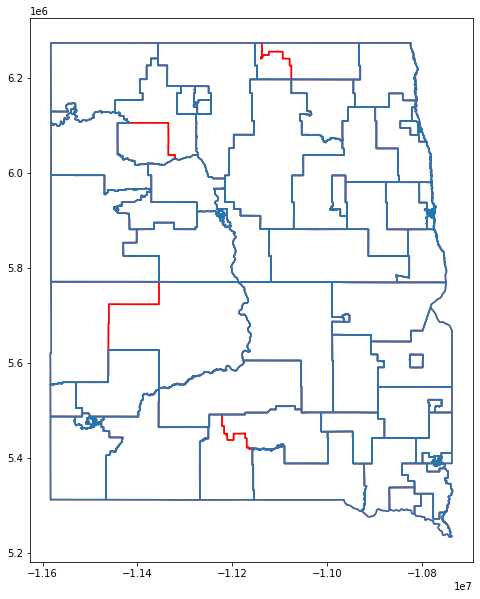

In [20]:
ax = national_sldu_dakotas.boundary.plot(color = "red", figsize = (10,10))
national_sldu_dakotas_dissolved.boundary.plot(ax = ax)


In [21]:
national_sldu_dakotas_dissolved = national_sldu_dakotas_dissolved[list(national_sldu_no_dakotas.columns)]

In [22]:
national_sldu = gp.GeoDataFrame(pd.concat([national_sldu_no_dakotas, national_sldu_dakotas_dissolved]), crs = 3857)

In [23]:
national_sldu.reset_index(inplace = True, drop = True)
national_sldu.sort_values("STATE", inplace = True)


In [24]:
national_sldl = national_sldl[national_sldl["DISTRICT"]!='None']
national_cong = national_cong[national_cong["DISTRICT"]!="None"]

In [25]:
national_sldl.reset_index(inplace = True, drop = True)
national_cong.reset_index(inplace = True, drop = True)

# Check the Files

In [26]:
print("SLDL District #s:")
print(national_sldl["STATE"].value_counts(sort = True).sort_index())


SLDL District #s:
AK     40
AL    105
AR    100
AZ     30
CA     80
CO     65
CT    151
DE     41
FL    120
GA    180
HI     51
IA    100
ID     35
IL    118
IN    100
KS    125
KY    100
LA    105
MA    160
MD     71
ME    151
MI    110
MN    134
MO    163
MS    122
NC    120
ND     49
NJ     40
NM     70
NV     42
NY    150
OK    101
OR     60
PA    203
RI     75
SC    124
SD     37
TN     99
TX    150
UT     75
VA    100
VT    109
WA     49
WI     99
WV    100
WY     62
Name: STATE, dtype: int64


In [27]:
print("SLDU District #s:")
print(national_sldu["STATE"].value_counts(sort = True).sort_index())

SLDU District #s:
AK    20
AL    35
AR    35
AZ    30
CA    40
CO    35
CT    36
DE    21
FL    40
GA    56
HI    25
IA    50
ID    35
IL    59
IN    50
KS    40
KY    38
LA    39
MA    40
MD    47
ME    35
MI    38
MN    67
MO    34
MS    52
NC    50
ND    47
NE    49
NJ    40
NM    42
NV    21
OK    48
OR    30
PA    50
RI    38
SC    46
SD    35
TN    33
TX    31
UT    29
VA    40
VT    16
WA    49
WI    33
WV    17
WY    31
Name: STATE, dtype: int64


In [28]:
print("CONG District #s:")
print(national_cong["STATE"].value_counts(sort = True).sort_index())

CONG District #s:
AL     7
AR     4
AZ     9
CA    52
CO     8
CT     5
FL    28
GA    14
HI     2
IA     4
ID     2
IL    17
IN     9
KS     4
KY     6
LA     6
MA     9
MD     8
ME     2
MI    13
MN     8
MS     4
MT     2
NC    14
NE     3
NJ    12
NM     3
NV     4
OH    15
OK     5
OR     6
PA    17
RI     2
SC     7
TN     9
TX    38
UT     4
VA    11
WA    10
WI     8
WV     2
Name: STATE, dtype: int64


## Look into missing states / data

In [29]:
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

In [30]:
for state in states:
    if state not in list(national_sldl["STATE"].unique()):
        print(state, "- no SLDL" )
    if state not in list(national_sldu["STATE"].unique()):
        print(state, "- no SLDU" )
    if state not in list(national_cong["STATE"].unique()):
        print(state, "- no CONG" )

AK - no CONG
DE - no CONG
MO - no CONG
MT - no SLDL
MT - no SLDU
ND - no CONG
NE - no SLDL
NH - no SLDL
NH - no SLDU
NH - no CONG
NY - no SLDU
NY - no CONG
OH - no SLDL
OH - no SLDU
SD - no CONG
VT - no CONG
WY - no CONG


# Plot the Files

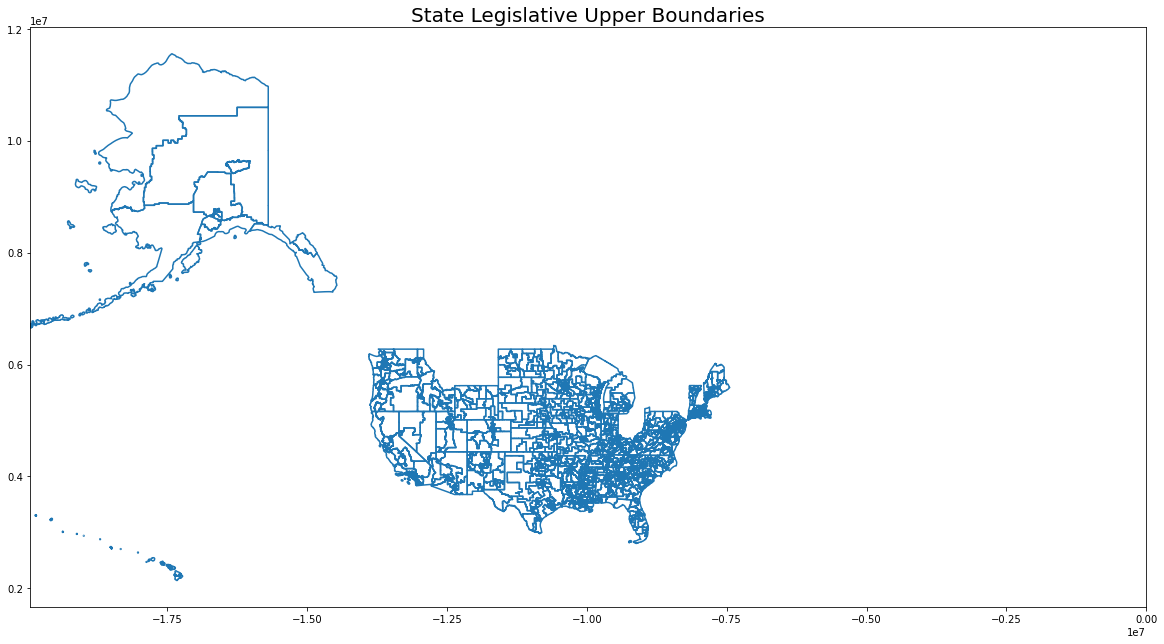

In [31]:
plot = national_sldu.boundary.plot(figsize = (20,20))
plot.set_xlim(([-19951913.22784543, 0]))
plot.set_title("State Legislative Upper Boundaries", fontsize = 20)
plot.figure.savefig("./sldl_national.jpg", bbox_inches = "tight")

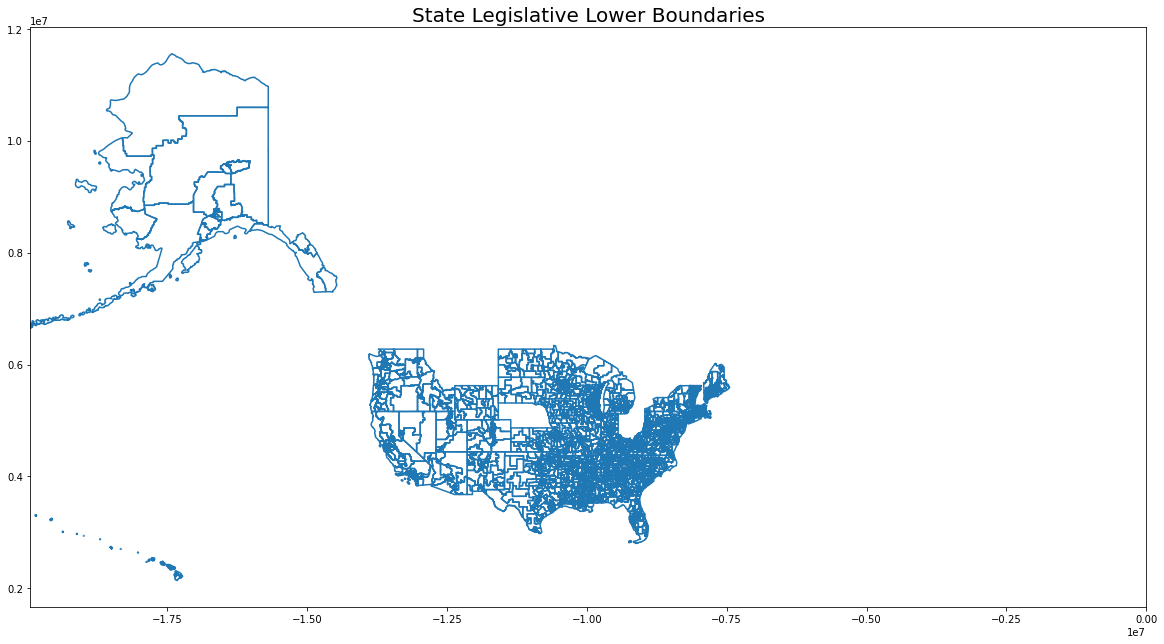

In [32]:
plot = national_sldl.boundary.plot(figsize = (20,20))
plot.set_xlim(([-19951913.22784543, 0]))
plot.set_title("State Legislative Lower Boundaries", fontsize = 20)
plot.figure.savefig("./sldu_national.jpg", bbox_inches = "tight")

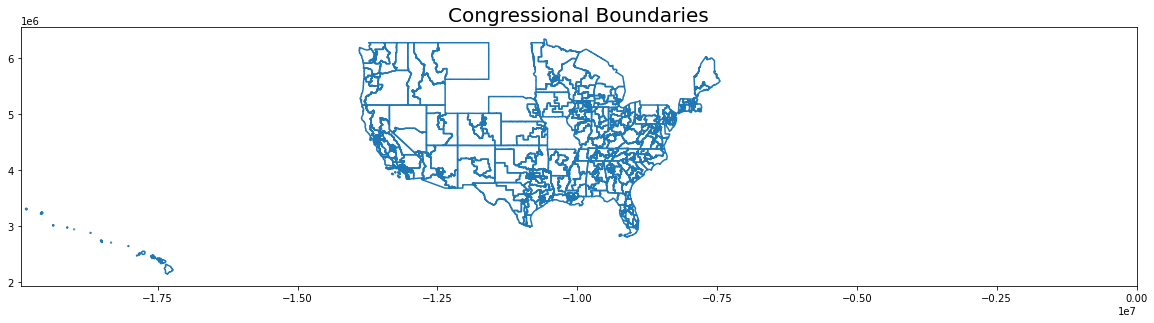

In [33]:
plot = national_cong.boundary.plot(figsize = (20,20))
plot.set_xlim(([-19951913.22784543, 0]))
plot.set_title("Congressional Boundaries", fontsize = 20)
plot.figure.savefig("./cong_national.jpg", bbox_inches = "tight")

# Export to GDF

In [34]:
# os.mkdir("./completed_files/national_sldl")
# os.mkdir("./completed_files/national_sldu")
# os.mkdir("./completed_files/national_cong")

In [35]:
national_sldl.to_file("./completed_files/national_sldl/national_sldl.shp")
national_sldu.to_file("./completed_files/national_sldu/national_sldu.shp")
national_cong.to_file("./completed_files/national_cong/national_cong.shp")

/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
/Users/peterhorton/opt/anaconda3/envs/geo_env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
